Test juste camera

In [2]:
import cv2
import numpy as np

VideoCap=cv2.VideoCapture(0)
VideoCap.isOpened()
#i = 0
#print(return_camera_indices())
while True:
    #i = i+1
    check, frame= VideoCap.read()
    

    cv2.imshow('image', frame)
    

    if cv2.waitKey(1)&0xFF==ord('q'):
        VideoCap.release()
        cv2.destroyAllWindows()
        break
    
print(frame)
VideoCap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

Test basique :

In [19]:
import math 
#print(round(2.1))

print(math.ceil(4.2)) 
print(math.floor(4.2)) 

a = np.zeros((2,2))
print(a)

a = np.empty()


5
4
[[0. 0.]
 [0. 0.]]


TypeError: empty() missing required argument 'shape' (pos 1)

Test élargir les obstacles

631
[[47 46 45 ... 22 23 24]
 [47 46 45 ... 18 17 16]]


<Figure size 432x288 with 0 Axes>

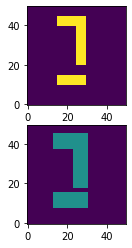

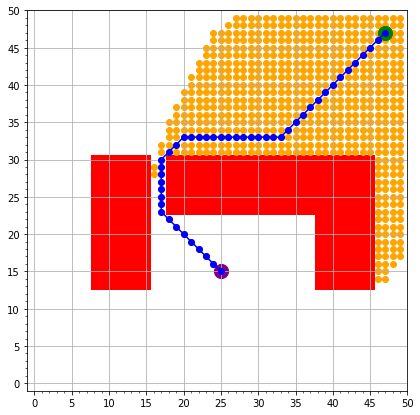

In [1]:
from Map import Map
from robot import Robot
import optimal_path as op
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
import video_frame as vf

George = Robot((47,47),(25,15))
lausanne = Map(5,50)

# Grid test initialisation
frame = np.zeros((50,50))
frame[10:15,15:30] = 1
frame[20:40,25:30] = 1
frame[40:45,15:30] = 1



# Expand the grid 
new_frame = lausanne.security_grid_expand(frame)


########################
## PLOT AND PATH CALCULATION TEST
#########################
len_i = len(frame)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(2,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
ax[0].imshow(frame, vmin=0, vmax=1, origin='lower', interpolation='none', alpha=1)
ax[1].imshow(new_frame, vmin=0, vmax=1, origin='lower', interpolation='none', alpha=1)
plt.draw()

path, visitedNodes = op.path_computation(George.get_start() , George.get_goal() , len_i, new_frame)

George.set_path(path) 
George.set_visit_nodes(visitedNodes) 

# Display the optimal path
op.display_map(len_i,  new_frame,  George.get_visit_nodes(), George.get_path(), George.get_start(), George.get_goal())


plt.show()




AFFICHE LA FRAME

In [6]:
from Map import Map
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
import video_frame as vf

np.set_printoptions(threshold=sys.maxsize)

frame = vf.frame_capture(10,0) 

hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

print(hsvImage)


#print(frame[350,600])

[[[ 12 133 199]
  [ 12 133 202]
  [ 12 138 204]
  [ 12 134 207]
  [ 13 135 204]
  [ 13 134 205]
  [ 12 131 207]
  [ 12 130 208]
  [ 14 137 205]
  [ 14 136 206]
  [ 12 127 209]
  [ 12 126 211]
  [ 12 126 215]
  [ 12 126 214]
  [ 13 124 212]
  [ 13 122 215]
  [ 12 126 215]
  [ 12 125 217]
  [ 14 126 215]
  [ 14 124 216]
  [ 13 129 223]
  [ 13 130 222]
  [ 13 116 213]
  [ 13 115 215]
  [ 10 115 223]
  [ 10 115 223]
  [ 12 120 221]
  [ 12 120 224]
  [ 12 121 230]
  [ 12 121 230]
  [ 11 123 235]
  [ 11 122 236]
  [ 12 124 239]
  [ 12 124 241]
  [ 13 117 236]
  [ 13 117 236]
  [ 11 120 245]
  [ 11 120 245]
  [ 12 124 245]
  [ 12 124 245]
  [ 12 123 246]
  [ 12 123 246]
  [ 11 120 247]
  [ 11 120 247]
  [ 12 122 244]
  [ 12 120 246]
  [ 10 124 253]
  [ 11 125 252]
  [ 10 121 254]
  [ 10 121 254]
  [ 10 116 254]
  [ 10 116 254]
  [ 10 115 252]
  [ 10 116 251]
  [ 11 118 250]
  [ 11 118 250]
  [ 10 120 255]
  [ 10 117 255]
  [ 11 116 250]
  [ 11 116 250]
  [ 10 118 255]
  [ 10 119 255]
  [ 11 1

IndexError: index 350 is out of bounds for axis 0 with size 120

PREND UNE PHOTO ET ENREGISTRE

In [12]:
import cv2
VideoCap=cv2.VideoCapture(0)
success,image = VideoCap.read()
while success:  
  success,image = VideoCap.read()
  cv2.imshow('image',image)
  keyVal = cv2.waitKey(1) & 0xFF
  if keyVal == ord('q'):
      cv2.imwrite("frame.jpg", image)  # save frame as JPEG file  
      break

TEST RESIZING 

In [4]:
from Map import Map
from robot import Robot
import optimal_path as op
#import matplotlib.pyplot as plt
#import math
import cv2
import numpy as np
import video_frame as vf
import sys
import vision as vs

np.set_printoptions(threshold=sys.maxsize)

print('init object')

George = Robot((47,47),(25,15))
lausanne = Map(5,50)

print('start')
#frame = cv2.imread('frame.jpg')
#frame = vf.frame_capture(2, 1)

VideoCap=cv2.VideoCapture(1)

mask = vs.mask_map_init(VideoCap)

cv2.imshow("mask", mask)

"""
######################################################
# récupération du mask ---> Fonction Xav 

blue = 60

color = blue
sensitivity = 10

lo=np.array([color - sensitivity, 0, 0])
hi=np.array([color + sensitivity, 255, 255])

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
frame=cv2.blur(frame, (5, 5))
mask=cv2.inRange(frame, lo, hi)
#mask=cv2.erode(mask, None, iterations=2)
#mask=cv2.dilate(mask, None, iterations=2) 
    
cv2.imshow("initial frame", frame)
cv2.imshow("mask", mask)

print("frame dimensions", frame.shape)

# ---------------
######################################################
"""

######################################################
# INIT THE GRID
print('Mask op')

# OP sur le mask


lausanne.init_grid(mask)

final_frame = lausanne.get_map()

cv2.imshow("final secure grid", final_frame)
######################################################

######################################################
# PATH COMPUTATION
#new_frame = lausanne.security_grid_expand(frame)

######################################################


print('wait end')
cv2.waitKey(0)

cv2.destroyAllWindows()


init object
start
Mask op
Resized Dimensions :  (50, 88)
wait end


In [1]:
from Map import Map
from robot import Robot
import optimal_path as op
#import matplotlib.pyplot as plt
#import math
import cv2
import numpy as np
import video_frame as vf

print('init object')

George = Robot((47,47),(25,15))
lausanne = Map(5,50)

frame = np.zeros((50,82))
frame[10:20, 40:60] = 1

cv2.imshow("Grille de départ", frame)


grid = lausanne.security_grid_expand(frame)

cv2.imshow("Secured grid", grid)


print('wait end')
cv2.waitKey(0)

cv2.destroyAllWindows()


init object
wait end
